In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data sets from local machine
df = pd.read_csv(r'..\churn_data\Churn_data.csv')

#Set the Row,Col and width of data sets
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)


In [3]:
df.head()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s7.s5.s4.day.nomou.p4,s8.og.rev.p3,s8.ic.mou.all.p3,target,s7.new.rev.p2.p6,s6.rtd.mou.p2.m2,s7.rtd.mou.p2.p6,s1.new.rev.p2,s1.new.rev.p1,s1.og.hom.mou.p1,s7.rev.p2.p6,s1.og.hom.rev.p2,s1.rtd.mou.p1,s1.og.rev.all.p1,s1.og.mou.all.p1,s3.og.rev.all.p1,s7.new.rev.p3.p6,ds.usg.p6,snd.dec.p2,s3.og.mou.all.p1,ds.og.usg.p4,s1.og.mou.all.p2,s8.og.rev.p6,s1.og.hom.mou.p2,s5.og.rev.all.p1,s1.og.rev.all.p2,s1.rtd.mou.p2,s5.rtd.mou.p1,s1.og.mou.any.p2,s4.day.no.mou.p2,s1.hom.rmg.rev.p2,s7.rtd.mou.p3.p6,s5.og.mou.all.p1,s5.og.hom.mou.p1,s3.new.rev.p1,s4.usg.ins.p1,s2.s4.day.no.mou.p2,s7.new.rev.l21.p6,s5.rev.p1,s5.s4.day.no.mou.p2,tot.s4.day.no.mou.p2,s8.new.rev.p3,s3.og.mou.all.p2,s1.rev.p1,s4.loc.og.ins.p1,s1.loc.og.mou.p1,s4.og.any.p2,prop.og.mou.any.p2,s4.low.blnc.ins.p3,s1.loc.og.mou.p2,s5.new.rev.p2,s5.new.rev.p1,s4.low.blnc.ins.l14,s3.og.hom.mou.p1,s7.rtd.mou.l21.p6,s4.loc.og.ins.l14,s8.rtd.mou.p3,s4.dec.ins.l14,s2.s4.day.no.mou.p3,s3.new.rev.p2,tot.s4.day.no.mou.p3,s5.og.mou.all.p2,s4.loc.ic.ins.l14,s4.usg.ins.l14,s4.loc.og.ins.p2,s3.rtd.mou.p1,s7.s5.s4.day.nomou.p2,s8.og.mou.all.p6,s5.og.hom.mou.p2,s7.rtd.mou.m1.m2,prop.og.mou.tot.mou.all.p2,s8.rev.p6,s7.s5.s4.day.nomou.p3,s5.rev.p2,s1.new.rev.m2,s3.og.rev.3db.p5,s4.rch.val.gt.30.p2,s8.rtd.mou.p6,s4.std.ins.l14,s4.low.blnc.ins.p2,s4.low.blnc.ins.p6,s4.loc.ins.l14,s4.low.blnc.ins.m2,s4.data.ins.l14,prop.loc.i2i.mou.og.mou.p6,s4.dec.ins.p2,s1.rev.p2,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,-0.72,39.44,1.000000,7.16,0.666667,-0.60,-0.73,1,0.05,-0.71,0.06,16.3180,0.4378,0.3666,0.03,16.3180,0.3666,0.4378,0.3666,0.22,0.34,1,-0.60,0.18,1,13.6665,-0.13,13.6665,0.44,16.3180,13.6665,0.37,16.4497,1,16.3180,0.35,0.37,0.37,0.22,1,2.0,0.49,0.44,2,3,-0.90,2.44,0.4378,2,2.3832,22,38.660512,7,16.4497,7.04,0.44,6,0.18,0.46,12,-0.50,11,2.00,2.91,3,5.90,9,11,5,0.18,0.666667,-0.11,5.90,0.240533,0.343672,-0.12,0.666667,7.04,295.1889,3.676096,0,-0.11,0,6,9,12,3,0,0.494346,4,6.3180,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,-0.08,18.89,0.500000,1.10,0.583333,-0.14,0.00,1,0.00,-0.96,0.01,0.7562,0.7562,0.6333,0.01,0.7562,0.6333,0.7562,0.6333,0.38,0.05,0,-0.84,0.32,0,0.6333,-0.15,0.6333,0.76,0.7562,0.6333,0.63,0.6500,1,0.7562,0.10,0.63,0.63,0.38,1,6.0,0.22,0.76,6,6,-0.14,0.24,0.7562,1,0.6500,2,4.773690,13,0.6500,0.76,0.76,13,0.32,0.24,4,-0.11,4,5.00,0.29,10,0.63,13,4,1,0.32,1.000000,-0.13,0.63,0.459725,0.046568,-0.22,0.700000,0.76,158.6547,2.614274,0,-0.13,0,7,23,13,16,0,0.767617,1,0.7562,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,-0.09,29.50,0.384615,4.19,0.384615,-0.45,-1.03,1,0.01,-0.98,0.00,0.5174,0.2189,0.1833,0.01,0.5174,0.1833,0.2189,0.1833,0.11,0.33,1,-0.85,0.09,1,0.4332,-0.05,0.4332,0.22,0.5174,0.4332,0.18,0.4332,2,0.5174,0.25,0.18,0.18,0.11,1,2.0,0.61,0.22,2,5,-0.45,0.11,0.2189,1,0.1833,3,0.763355,10,0.4332,0.30,0.22,10,0.09,0.47,8,-0.39,8,2.00,0.13,6,0.25,13,8,2,0.09,0.400000,-0.12,0.25,0.111785,0.007634,-0.07,0.333333,0.30,99.5643,2.659691,0,-0.12,1,7,19,14,12,0,0.696090,2,0.5174,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,1.83,46.67,0.416667,0.40,0.250000,-0.02,-0.43,0,0.02,-0.92,0.02,1.2736,0.9751,0.8166,-0.14,1.2736,0.8166,0.9751,0.8166,0.49,0.04,2,-0.83,0.41,2,1.0666,-0.17,1.0666,0.98,1.2736,1.0666,0.82,1.0665,2,1.2736,0.04,0.82,0.82,0.49,1,2.5,0.17,0.98,3,5,-0.02,0.31,-9.0249,1,0.8165,4,0.787963,11,1.0665,0.98,0.98,10,0.41,0.18,5,-0.02,5,2.25,0.37,9,0.

In [4]:
df.shape

(25000, 111)

In [5]:
df.size

2775000

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 111 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    s6.new.rev.p2.m2            float64
 1    s1.new.rev.m1               float64
 2    s3.og.rev.4db.p5            float64
 3    s3.new.rev.4db.p5           float64
 4    s4.usg.ins.p2               int64  
 5    s4.og.unq.any.p2            int64  
 6    s2.rch.val.p6               float64
 7    s1.og.rev.all.m1            float64
 8    s8.new.rev.p6               float64
 9    s4.loc.ic.ins.p1            int64  
 10   s8.mbl.p2                   float64
 11   s2.rch.val.l67              float64
 12   s7.s4.day.no.mou.p2.p4      float64
 13   s3.new.rev.p3               float64
 14   s7.s5.s4.day.nomou.p4       float64
 15   s8.og.rev.p3                float64
 16   s8.ic.mou.all.p3            float64
 17   target                      int64  
 18   s7.new.rev.p2.p6            float64
 19   s6

In [9]:
df.dtypes

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                   int64
s4.og.unq.any.p2                int64
s2.rch.val.p6                 float64
s1.og.rev.all.m1              float64
s8.new.rev.p6                 float64
s4.loc.ic.ins.p1                int64
s8.mbl.p2                     float64
s2.rch.val.l67                float64
s7.s4.day.no.mou.p2.p4        float64
s3.new.rev.p3                 float64
s7.s5.s4.day.nomou.p4         float64
s8.og.rev.p3                  float64
s8.ic.mou.all.p3              float64
target                          int64
s7.new.rev.p2.p6              float64
s6.rtd.mou.p2.m2              float64
s7.rtd.mou.p2.p6              float64
s1.new.rev.p2                 float64
s1.new.rev.p1                 float64
s1.og.hom.mou.p1              float64
s7.rev.p2.p6                  float64
s1.og.hom.rev.p2              float64
s1.rtd.mou.p

In [7]:
df.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s7.s5.s4.day.nomou.p4,s8.og.rev.p3,s8.ic.mou.all.p3,target,s7.new.rev.p2.p6,s6.rtd.mou.p2.m2,s7.rtd.mou.p2.p6,s1.new.rev.p2,s1.new.rev.p1,s1.og.hom.mou.p1,s7.rev.p2.p6,s1.og.hom.rev.p2,s1.rtd.mou.p1,s1.og.rev.all.p1,s1.og.mou.all.p1,s3.og.rev.all.p1,s7.new.rev.p3.p6,ds.usg.p6,snd.dec.p2,s3.og.mou.all.p1,ds.og.usg.p4,s1.og.mou.all.p2,s8.og.rev.p6,s1.og.hom.mou.p2,s5.og.rev.all.p1,s1.og.rev.all.p2,s1.rtd.mou.p2,s5.rtd.mou.p1,s1.og.mou.any.p2,s4.day.no.mou.p2,s1.hom.rmg.rev.p2,s7.rtd.mou.p3.p6,s5.og.mou.all.p1,s5.og.hom.mou.p1,s3.new.rev.p1,s4.usg.ins.p1,s2.s4.day.no.mou.p2,s7.new.rev.l21.p6,s5.rev.p1,s5.s4.day.no.mou.p2,tot.s4.day.no.mou.p2,s8.new.rev.p3,s3.og.mou.all.p2,s1.rev.p1,s4.loc.og.ins.p1,s1.loc.og.mou.p1,s4.og.any.p2,prop.og.mou.any.p2,s4.low.blnc.ins.p3,s1.loc.og.mou.p2,s5.new.rev.p2,s5.new.rev.p1,s4.low.blnc.ins.l14,s3.og.hom.mou.p1,s7.rtd.mou.l21.p6,s4.loc.og.ins.l14,s8.rtd.mou.p3,s4.dec.ins.l14,s2.s4.day.no.mou.p3,s3.new.rev.p2,tot.s4.day.no.mou.p3,s5.og.mou.all.p2,s4.loc.ic.ins.l14,s4.usg.ins.l14,s4.loc.og.ins.p2,s3.rtd.mou.p1,s7.s5.s4.day.nomou.p2,s8.og.mou.all.p6,s5.og.hom.mou.p2,s7.rtd.mou.m1.m2,prop.og.mou.tot.mou.all.p2,s8.rev.p6,s7.s5.s4.day.nomou.p3,s5.rev.p2,s1.new.rev.m2,s3.og.rev.3db.p5,s4.rch.val.gt.30.p2,s8.rtd.mou.p6,s4.std.ins.l14,s4.low.blnc.ins.p2,s4.low.blnc.ins.p6,s4.loc.ins.l14,s4.low.blnc.ins.m2,s4.data.ins.l14,prop.loc.i2i.mou.og.mou.p6,s4.dec.ins.p2,s1.rev.p2,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.0000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.003730,281.073083,4.890003,7.070194,5.460080,28.532520,72.208906,218.517937,-0.028327,3.254720,-0.073908,71.354504,28.481545,10.961799,0.284181,-0.074922,-0.051559,0.316680,0.166592,-0.015919,0.168325,70.217496,39.055654,45.029034,0.170023,52.511325,47.506108,30.592874,46.066058,5.430644,0.380334,1.349440,-0.010508,7.620248,1.467040,82.554175,-0.021732,80.639951,14.545135,54.865775,85.221383,21.701493,81.203703,0.304080,54.865775,0.383934,21.073729,20.682926,8.071755,3.091200,1.119960,0.545179,22.966148,1.130200,1.539920,-0.091492,8.480784,40.175275,3.004600,39.093190,50.413040,47.909581,4.335200,70.048429,27.175940,20.415673,4.061240,7.511646,0.547065,10.794680,-0.112961,8.974040,1.812184,9.260823,3.029880,26

In [8]:
# Determine the null values
df.isnull().sum()

s6.new.rev.p2.m2              0
s1.new.rev.m1                 0
s3.og.rev.4db.p5              0
s3.new.rev.4db.p5             0
s4.usg.ins.p2                 0
s4.og.unq.any.p2              0
s2.rch.val.p6                 0
s1.og.rev.all.m1              0
s8.new.rev.p6                 0
s4.loc.ic.ins.p1              0
s8.mbl.p2                     0
s2.rch.val.l67                0
s7.s4.day.no.mou.p2.p4        0
s3.new.rev.p3                 0
s7.s5.s4.day.nomou.p4         0
s8.og.rev.p3                  0
s8.ic.mou.all.p3              0
target                        0
s7.new.rev.p2.p6              0
s6.rtd.mou.p2.m2              0
s7.rtd.mou.p2.p6              0
s1.new.rev.p2                 0
s1.new.rev.p1                 0
s1.og.hom.mou.p1              0
s7.rev.p2.p6                  0
s1.og.hom.rev.p2              0
s1.rtd.mou.p1                 0
s1.og.rev.all.p1              0
s1.og.mou.all.p1              0
s3.og.rev.all.p1              0
s7.new.rev.p3.p6              0
ds.usg.p

In [9]:
# Removeing the duplicate records 
df.duplicated().sum()

0

In [10]:
#Find columns with unique value and drop its
unique_columns = df.columns[df.nunique() == 1]
unique_value = df.drop(columns = unique_columns, axis= 0)
unique_value.head()


,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s7.s5.s4.day.nomou.p4,s8.og.rev.p3,s8.ic.mou.all.p3,target,s7.new.rev.p2.p6,s6.rtd.mou.p2.m2,s7.rtd.mou.p2.p6,s1.new.rev.p2,s1.new.rev.p1,s1.og.hom.mou.p1,s7.rev.p2.p6,s1.og.hom.rev.p2,s1.rtd.mou.p1,s1.og.rev.all.p1,s1.og.mou.all.p1,s3.og.rev.all.p1,s7.new.rev.p3.p6,ds.usg.p6,snd.dec.p2,s3.og.mou.all.p1,ds.og.usg.p4,s1.og.mou.all.p2,s8.og.rev.p6,s1.og.hom.mou.p2,s5.og.rev.all.p1,s1.og.rev.all.p2,s1.rtd.mou.p2,s5.rtd.mou.p1,s1.og.mou.any.p2,s4.day.no.mou.p2,s1.hom.rmg.rev.p2,s7.rtd.mou.p3.p6,s5.og.mou.all.p1,s5.og.hom.mou.p1,s3.new.rev.p1,s4.usg.ins.p1,s2.s4.day.no.mou.p2,s7.new.rev.l21.p6,s5.rev.p1,s5.s4.day.no.mou.p2,tot.s4.day.no.mou.p2,s8.new.rev.p3,s3.og.mou.all.p2,s1.rev.p1,s4.loc.og.ins.p1,s1.loc.og.mou.p1,s4.og.any.p2,prop.og.mou.any.p2,s4.low.blnc.ins.p3,s1.loc.og.mou.p2,s5.new.rev.p2,s5.new.rev.p1,s4.low.blnc.ins.l14,s3.og.hom.mou.p1,s7.rtd.mou.l21.p6,s4.loc.og.ins.l14,s8.rtd.mou.p3,s4.dec.ins.l14,s2.s4.day.no.mou.p3,s3.new.rev.p2,tot.s4.day.no.mou.p3,s5.og.mou.all.p2,s4.loc.ic.ins.l14,s4.usg.ins.l14,s4.loc.og.ins.p2,s3.rtd.mou.p1,s7.s5.s4.day.nomou.p2,s8.og.mou.all.p6,s5.og.hom.mou.p2,s7.rtd.mou.m1.m2,prop.og.mou.tot.mou.all.p2,s8.rev.p6,s7.s5.s4.day.nomou.p3,s5.rev.p2,s1.new.rev.m2,s3.og.rev.3db.p5,s4.rch.val.gt.30.p2,s8.rtd.mou.p6,s4.std.ins.l14,s4.low.blnc.ins.p2,s4.low.blnc.ins.p6,s4.loc.ins.l14,s4.low.blnc.ins.m2,s4.data.ins.l14,prop.loc.i2i.mou.og.mou.p6,s4.dec.ins.p2,s1.rev.p2,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,-0.72,39.44,1.000000,7.16,0.666667,-0.60,-0.73,1,0.05,-0.71,0.06,16.3180,0.4378,0.3666,0.03,16.3180,0.3666,0.4378,0.3666,0.22,0.34,1,-0.60,0.18,1,13.6665,-0.13,13.6665,0.44,16.3180,13.6665,0.37,16.4497,1,16.3180,0.35,0.37,0.37,0.22,1,2.0,0.49,0.44,2,3,-0.90,2.44,0.4378,2,2.3832,22,38.660512,7,16.4497,7.04,0.44,6,0.18,0.46,12,-0.50,11,2.00,2.91,3,5.90,9,11,5,0.18,0.666667,-0.11,5.90,0.240533,0.343672,-0.12,0.666667,7.04,295.1889,3.676096,0,-0.11,0,6,9,12,3,0,0.494346,4,6.3180,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,-0.08,18.89,0.500000,1.10,0.583333,-0.14,0.00,1,0.00,-0.96,0.01,0.7562,0.7562,0.6333,0.01,0.7562,0.6333,0.7562,0.6333,0.38,0.05,0,-0.84,0.32,0,0.6333,-0.15,0.6333,0.76,0.7562,0.6333,0.63,0.6500,1,0.7562,0.10,0.63,0.63,0.38,1,6.0,0.22,0.76,6,6,-0.14,0.24,0.7562,1,0.6500,2,4.773690,13,0.6500,0.76,0.76,13,0.32,0.24,4,-0.11,4,5.00,0.29,10,0.63,13,4,1,0.32,1.000000,-0.13,0.63,0.459725,0.046568,-0.22,0.700000,0.76,158.6547,2.614274,0,-0.13,0,7,23,13,16,0,0.767617,1,0.7562,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,-0.09,29.50,0.384615,4.19,0.384615,-0.45,-1.03,1,0.01,-0.98,0.00,0.5174,0.2189,0.1833,0.01,0.5174,0.1833,0.2189,0.1833,0.11,0.33,1,-0.85,0.09,1,0.4332,-0.05,0.4332,0.22,0.5174,0.4332,0.18,0.4332,2,0.5174,0.25,0.18,0.18,0.11,1,2.0,0.61,0.22,2,5,-0.45,0.11,0.2189,1,0.1833,3,0.763355,10,0.4332,0.30,0.22,10,0.09,0.47,8,-0.39,8,2.00,0.13,6,0.25,13,8,2,0.09,0.400000,-0.12,0.25,0.111785,0.007634,-0.07,0.333333,0.30,99.5643,2.659691,0,-0.12,1,7,19,14,12,0,0.696090,2,0.5174,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,1.83,46.67,0.416667,0.40,0.250000,-0.02,-0.43,0,0.02,-0.92,0.02,1.2736,0.9751,0.8166,-0.14,1.2736,0.8166,0.9751,0.8166,0.49,0.04,2,-0.83,0.41,2,1.0666,-0.17,1.0666,0.98,1.2736,1.0666,0.82,1.0665,2,1.2736,0.04,0.82,0.82,0.49,1,2.5,0.17,0.98,3,5,-0.02,0.31,-9.0249,1,0.8165,4,0.787963,11,1.0665,0.98,0.98,10,0.41,0.18,5,-0.02,5,2.25,0.37,9,0.

In [11]:
# after drop the unique columns find dataframe shape
unique_value.shape

(25000, 111)

# Step 4

In [12]:
# Remove Zero Varience Variables
df_no_zero_var = df.loc[:, df.var() > 0]

print(df_no_zero_var.head())


   s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0             -0.76        88.0482          3.106604           3.754955   
1             -0.98        67.5039          3.094574           5.550865   
2             -0.98        33.9248          2.324016           2.438114   
3             -0.92        82.6780          2.630749           2.858961   
4             -0.97        96.8379          2.674316           2.912397   

   s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0              4                14          39.29            57.320   
1              1                 2          21.67            38.700   
2              2                 3          30.00            15.320   
3              2                 3          50.00            51.956   
4              3                 2          22.50            66.886   

   s8.new.rev.p6  s4.loc.ic.ins.p1  s8.mbl.p2  s2.rch.val.l67  \
0          -0.17                 1      -0.72           3

In [13]:
df_no_zero_var.shape

(25000, 111)

# Apply threshold value all over data sets

In [14]:
threshold = len(df) * 0.9

# Create a copy of the original DataFrame
df1 = df.copy()

# Iterate over each column
for col in df1.columns:
    # Check if the number of unique values exceeds the threshold
    if df[col].nunique() > threshold:
        # If the number of unique values exceeds the threshold, drop the column
        df1.drop(col, axis=1, inplace=True)

# Print the modified DataFrame
print(df1.head(10))


   s6.new.rev.p2.m2  s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  \
0             -0.76              4                14          39.29   
1             -0.98              1                 2          21.67   
2             -0.98              2                 3          30.00   
3             -0.92              2                 3          50.00   
4             -0.97              3                 2          22.50   
5              0.04              7                62         177.71   
6              2.41              4                39          44.83   
7              0.65              7                18          99.40   
8             -1.00              0                 0          69.09   
9             -0.48              7                23          51.20   

   s8.new.rev.p6  s4.loc.ic.ins.p1  s8.mbl.p2  s2.rch.val.l67  \
0          -0.17                 1      -0.72           39.44   
1          -0.32                 3      -0.08           18.89   
2          -0.05       

In [15]:
# Again Check Shape we got 97 columns
df1.shape

(25000, 97)

In [16]:
df1.describe()

,s6.new.rev.p2.m2,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s8.new.rev.p6,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s7.s5.s4.day.nomou.p4,s8.og.rev.p3,s8.ic.mou.all.p3,target,s7.new.rev.p2.p6,s6.rtd.mou.p2.m2,s7.rtd.mou.p2.p6,s1.new.rev.p2,s1.new.rev.p1,s1.og.hom.mou.p1,s7.rev.p2.p6,s1.og.hom.rev.p2,s1.rtd.mou.p1,s1.og.rev.all.p1,s1.og.mou.all.p1,s3.og.rev.all.p1,s7.new.rev.p3.p6,ds.usg.p6,snd.dec.p2,s3.og.mou.all.p1,ds.og.usg.p4,s1.og.mou.all.p2,s8.og.rev.p6,s1.og.hom.mou.p2,s5.og.rev.all.p1,s1.og.rev.all.p2,s1.rtd.mou.p2,s5.rtd.mou.p1,s1.og.mou.any.p2,s4.day.no.mou.p2,s1.hom.rmg.rev.p2,s7.rtd.mou.p3.p6,s5.og.mou.all.p1,s5.og.hom.mou.p1,s3.new.rev.p1,s4.usg.ins.p1,s2.s4.day.no.mou.p2,s7.new.rev.l21.p6,s5.rev.p1,s5.s4.day.no.mou.p2,tot.s4.day.no.mou.p2,s8.new.rev.p3,s3.og.mou.all.p2,s1.rev.p1,s4.loc.og.ins.p1,s1.loc.og.mou.p1,s4.og.any.p2,s4.low.blnc.ins.p3,s1.loc.og.mou.p2,s5.new.rev.p2,s5.new.rev.p1,s4.low.blnc.ins.l14,s3.og.hom.mou.p1,s7.rtd.mou.l21.p6,s4.loc.og.ins.l14,s8.rtd.mou.p3,s4.dec.ins.l14,s2.s4.day.no.mou.p3,s3.new.rev.p2,tot.s4.day.no.mou.p3,s5.og.mou.all.p2,s4.loc.ic.ins.l14,s4.usg.ins.l14,s4.loc.og.ins.p2,s3.rtd.mou.p1,s7.s5.s4.day.nomou.p2,s8.og.mou.all.p6,s5.og.hom.mou.p2,s8.rev.p6,s7.s5.s4.day.nomou.p3,s5.rev.p2,s4.rch.val.gt.30.p2,s8.rtd.mou.p6,s4.std.ins.l14,s4.low.blnc.ins.p2,s4.low.blnc.ins.p6,s4.loc.ins.l14,s4.low.blnc.ins.m2,s4.data.ins.l14,s4.dec.ins.p2,s1.rev.p2,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,s3.rev.p1
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.0000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.003730,5.460080,28.532520,72.208906,-0.028327,3.254720,-0.073908,71.354504,28.481545,10.961799,0.284181,-0.074922,-0.051559,0.316680,0.166592,-0.015919,0.168325,70.217496,39.055654,45.029034,0.170023,52.511325,47.506108,30.592874,46.066058,5.430644,0.380334,1.349440,-0.010508,7.620248,1.467040,82.554175,-0.021732,80.639951,14.545135,54.865775,85.221383,21.701493,81.203703,0.304080,54.865775,0.383934,21.073729,20.682926,8.071755,3.091200,1.119960,0.545179,22.966148,1.130200,1.539920,-0.091492,8.480784,40.175275,3.004600,39.093190,50.413040,4.335200,70.048429,27.175940,20.415673,4.061240,7.511646,0.547065,10.794680,-0.112961,8.974040,1.812184,9.260823,3.029880,26.163840,11.568720,11.152840,5.3014,7.834347,0.243996,-0.019034,25.686587,-0.017533,0.269130,31.035834,0.760120,-0.020207,2.625120,2.100160,10.303640,12.534120,8.203480,2.349680,4.394760,71.815476,5.731280,1.797320,8.382160,8.008660,12.540182,9.951366
std,2.727916,2.184444,28.061435,67.921490,0.354573,1.193271,8.829159,63.348225,44.601940,12.092535,0.333501,0.784939,1.005683,0.465191,0.110928,0.996750,0.109865,80.805037,49.565506,82.976569,0.138765,62.669791,84.681888,38.593189,83.482471,6.768661,0.172885,3

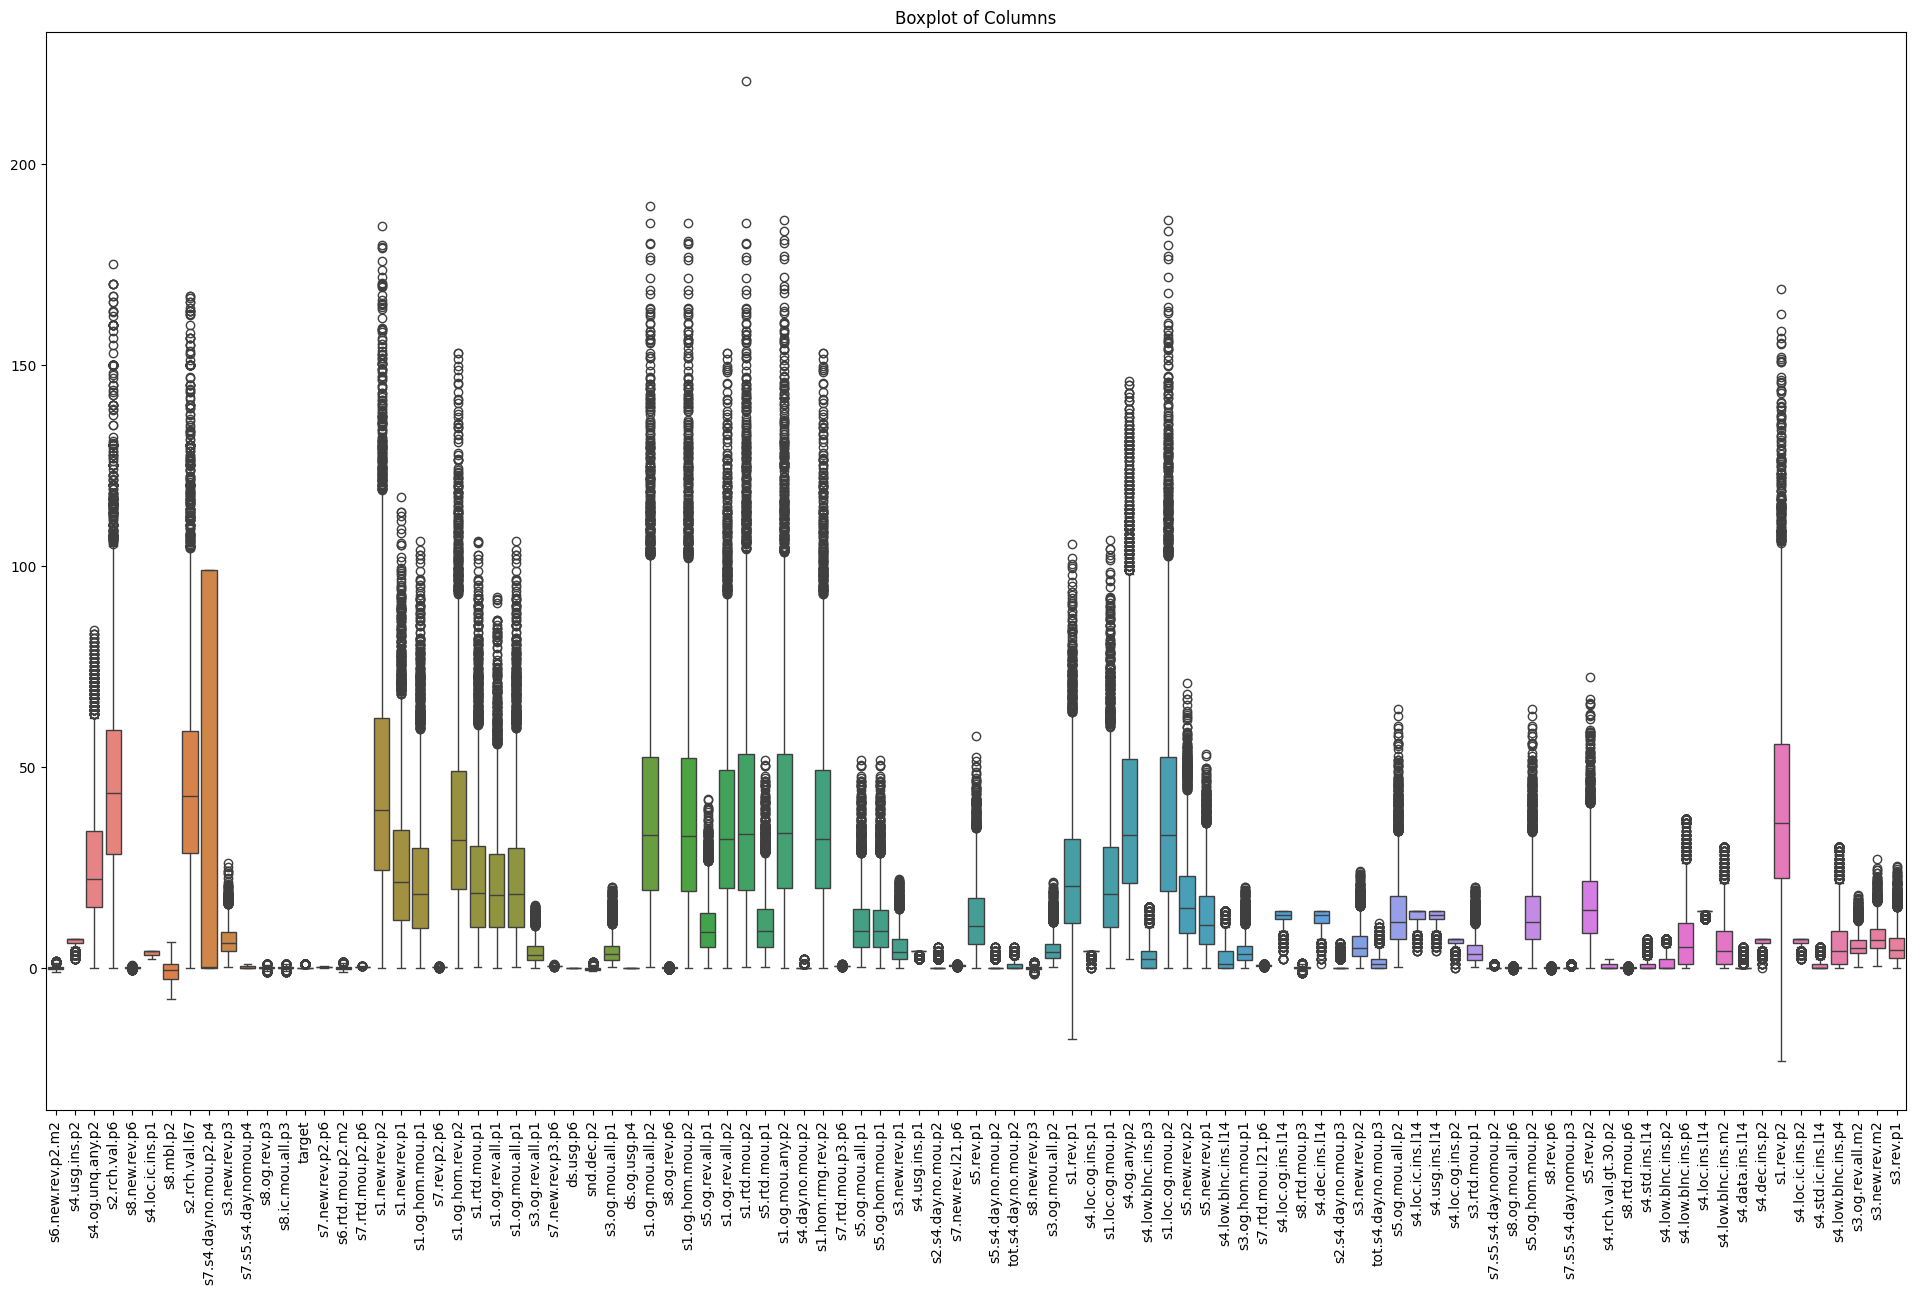

In [17]:
# Apply IQR Process...

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outliers = (df1 < (Q1 - threshold * IQR)) | (df1 > (Q3 + threshold * IQR))

clean_data = df1[~outliers.any(axis=1)]

plt.figure(figsize=(24, 14))  
plt.title('Boxplot of Columns')
sns.boxplot(data=clean_data)
plt.xticks(rotation=90)  
plt.show()


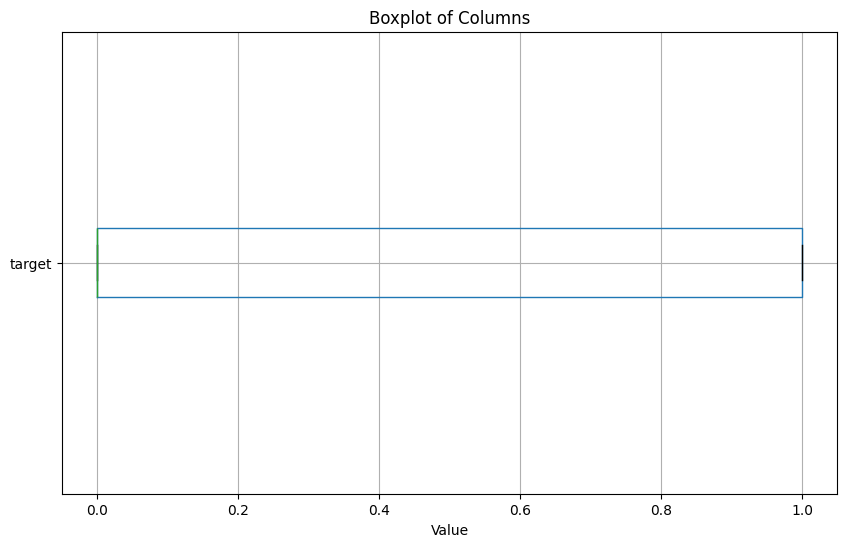

In [18]:
# Create a boxplot for each column...as your wish to see..
plt.figure(figsize=(10, 6))
df.boxplot(column='target', vert=False)
plt.xlabel('Value')
plt.title('Boxplot of Columns')
plt.show()

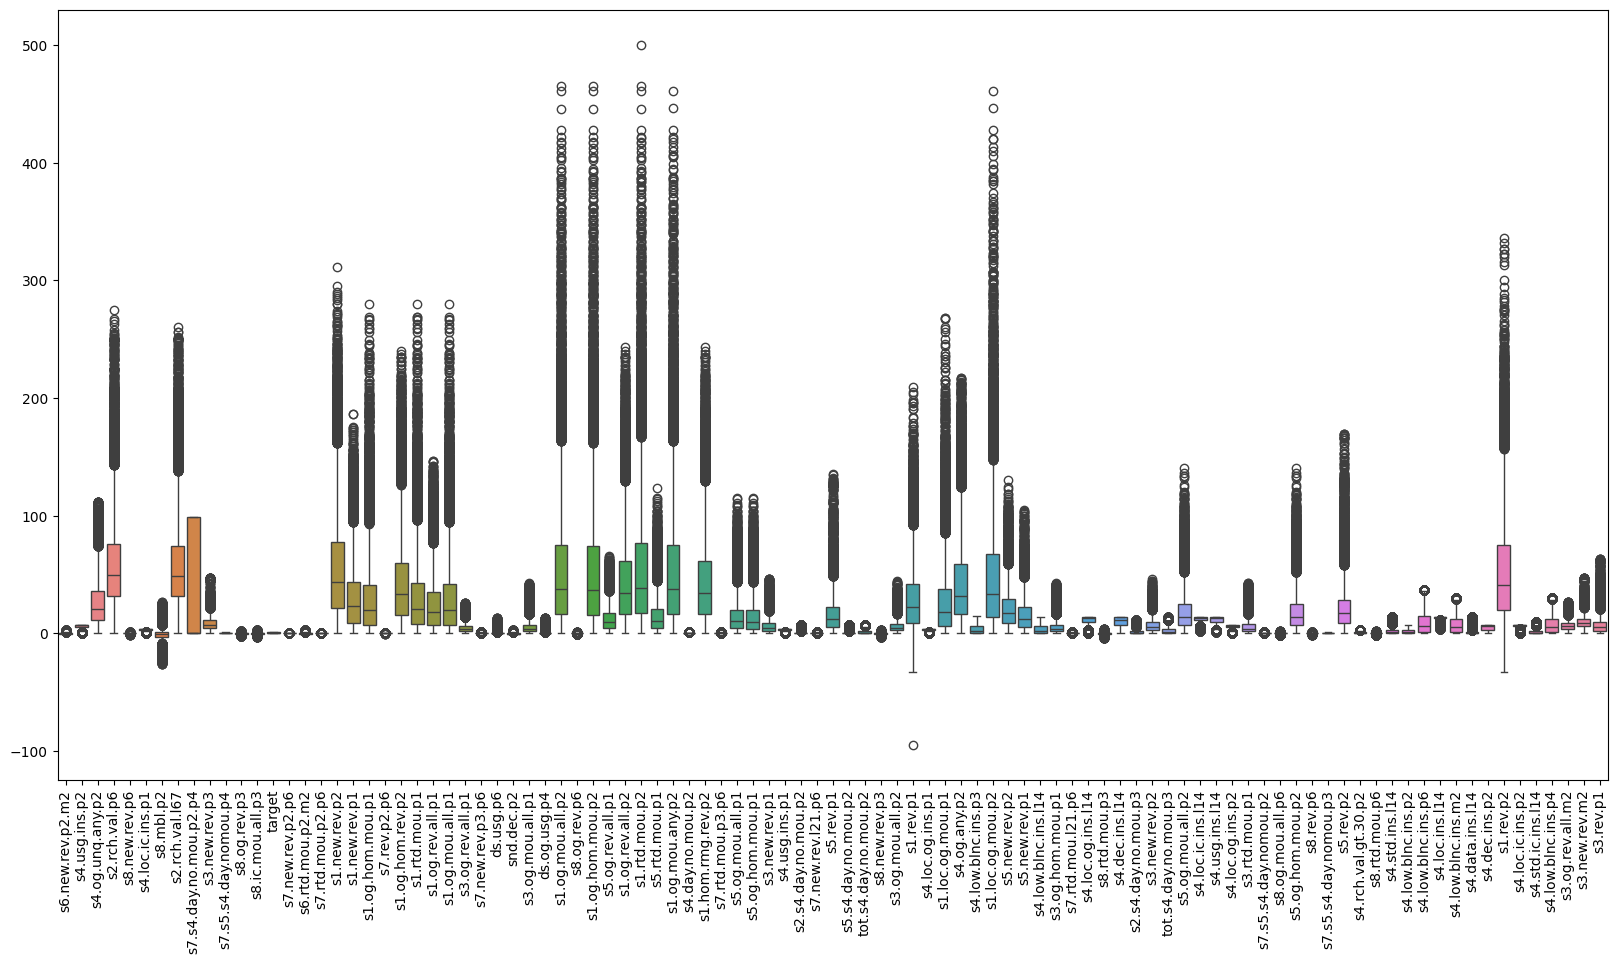

In [19]:
# Apply Standarzation +/- 3 
standardized_df = (df1 - df1.mean()) / df1.std()

threshold = 3

outliers = (standardized_df > threshold) | (standardized_df < -threshold)

clean_data = df1[~outliers.any(axis=1)]


plt.figure(figsize=(20, 10))  
sns.boxplot(data=clean_data)
plt.xticks(rotation=90)   
plt.show()


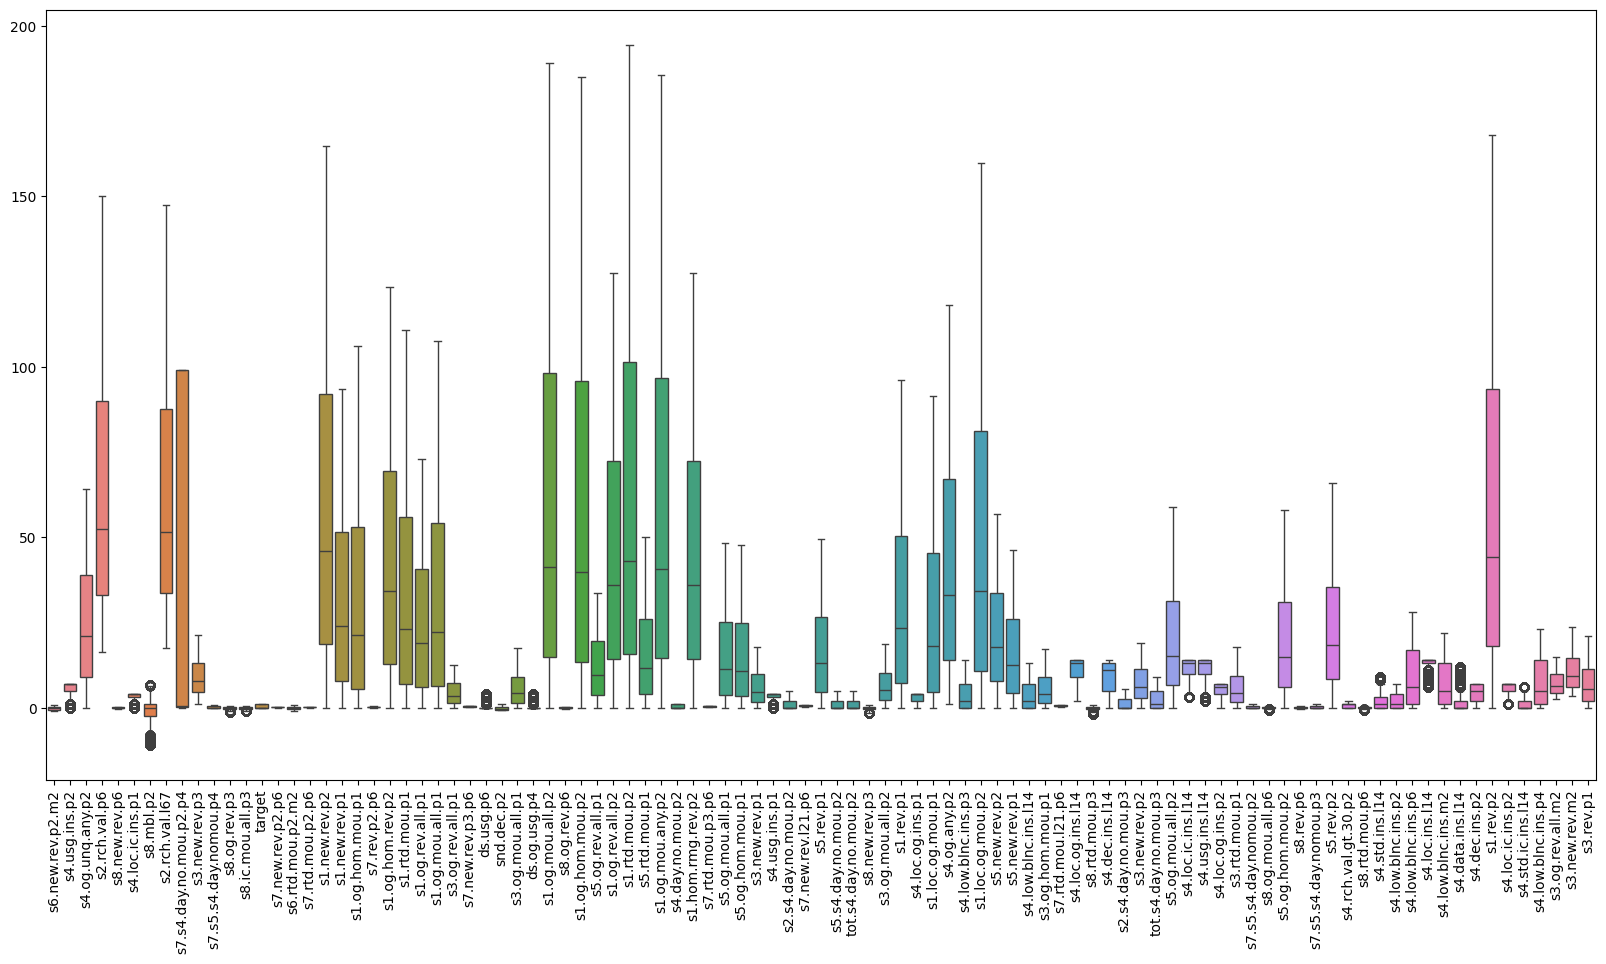

In [20]:
floor = df1.quantile(0.05)
cap = df1.quantile(0.90)

df_capped = df1.clip(lower=floor, upper=cap , axis=1)
plt.figure(figsize=(20,10))
sns.boxplot(data=df_capped)
plt.xticks(rotation=90)
plt.show()

In [23]:
# Calculate Unique value after clean the data sets

total_unique_values = df_capped.nunique().sum()  
print(total_unique_values)

for column in df_capped.columns:
    unique_values_count = df_capped[column].nunique()   
    unique_values_percentage = (unique_values_count / total_unique_values) * 100 
    print(f"Percentage of unique values in column '{column}': {unique_values_percentage:.2f}%")


321920
Percentage of unique values in column 's6.new.rev.p2.m2': 0.06%
Percentage of unique values in column 's4.usg.ins.p2': 0.00%
Percentage of unique values in column 's4.og.unq.any.p2': 0.02%
Percentage of unique values in column 's2.rch.val.p6': 1.54%
Percentage of unique values in column 's8.new.rev.p6': 0.03%
Percentage of unique values in column 's4.loc.ic.ins.p1': 0.00%
Percentage of unique values in column 's8.mbl.p2': 0.53%
Percentage of unique values in column 's2.rch.val.l67': 2.03%
Percentage of unique values in column 's7.s4.day.no.mou.p2.p4': 0.03%
Percentage of unique values in column 's3.new.rev.p3': 0.63%
Percentage of unique values in column 's7.s5.s4.day.nomou.p4': 0.05%
Percentage of unique values in column 's8.og.rev.p3': 0.06%
Percentage of unique values in column 's8.ic.mou.all.p3': 0.05%
Percentage of unique values in column 'target': 0.00%
Percentage of unique values in column 's7.new.rev.p2.p6': 0.01%
Percentage of unique values in column 's6.rtd.mou.p2.m2':

In [24]:
df2 = df_capped.copy()
df2.shape

(25000, 97)

In [25]:
# Count NaN values in each column
nan_counts = df2.isna().sum()

# Calculate the threshold for 5% missing values for records
record_threshold = len(df2) * 0.05

# Remove records with less than 5% missing values
clean_data_records = df2[df2.isna().sum(axis=1) <= record_threshold]
clean_data1 = clean_data_records.dropna(axis=0)

# Calculate the threshold for 50% missing values for variables
variable_threshold = len(df2.columns) * 0.5   

# Remove variables with more than 50% missing values
clean_data2 = clean_data1.dropna(thresh=variable_threshold, axis=1)

# Drop the columns with more than 50% missing values
clean_data3 = clean_data2.dropna(axis=1)

print("NaN counts for each column:")
print(nan_counts)

# Display the cleaned Datasets
print("\nCleaned DataFrame with records and variables removed:")
print(clean_data3.head(2))
clean_data3.shape

NaN counts for each column:
s6.new.rev.p2.m2          0
s4.usg.ins.p2             0
s4.og.unq.any.p2          0
s2.rch.val.p6             0
s8.new.rev.p6             0
s4.loc.ic.ins.p1          0
s8.mbl.p2                 0
s2.rch.val.l67            0
s7.s4.day.no.mou.p2.p4    0
s3.new.rev.p3             0
s7.s5.s4.day.nomou.p4     0
s8.og.rev.p3              0
s8.ic.mou.all.p3          0
target                    0
s7.new.rev.p2.p6          0
s6.rtd.mou.p2.m2          0
s7.rtd.mou.p2.p6          0
s1.new.rev.p2             0
s1.new.rev.p1             0
s1.og.hom.mou.p1          0
s7.rev.p2.p6              0
s1.og.hom.rev.p2          0
s1.rtd.mou.p1             0
s1.og.rev.all.p1          0
s1.og.mou.all.p1          0
s3.og.rev.all.p1          0
s7.new.rev.p3.p6          0
ds.usg.p6                 0
snd.dec.p2                0
s3.og.mou.all.p1          0
ds.og.usg.p4              0
s1.og.mou.all.p2          0
s8.og.rev.p6              0
s1.og.hom.mou.p2          0
s5.og.rev.all.p1    

(25000, 97)

In [26]:
df3= clean_data3.copy()

In [27]:
df3.size

2425000

In [28]:
df3.shape

(25000, 97)

In [29]:
numeric_columns = df3.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values with mean or median based on whether the variable is numeric
for column in numeric_columns:
    if df3[column].isnull().any():  # Check if the column has missing values
        if df3[column].dtype == 'float64' or df3[column].dtype == 'int64':  # Check if the column is numeric
            # Impute missing values with mean or median
            if df3[column].dtype == 'float64':  # For float columns, use mean
                mean_value = df3[column].mean()
                df3[column].fillna(mean_value, inplace=True)
            elif df3[column].dtype == 'int64':  # For integer columns, use median
                median_value = df3[column].median()
                df3[column].fillna(median_value, inplace=True)

# Display the Dataset after imputation
print(df3.head(3))
df3.size

   s6.new.rev.p2.m2  s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  \
0             -0.76              4                14          39.29   
1             -0.98              1                 2          21.67   
2             -0.98              2                 3          30.00   

   s8.new.rev.p6  s4.loc.ic.ins.p1  s8.mbl.p2  s2.rch.val.l67  \
0          -0.17                 1      -0.72           39.44   
1          -0.32                 3      -0.08           18.89   
2          -0.05                 3      -0.09           29.50   

   s7.s4.day.no.mou.p2.p4  s3.new.rev.p3  s7.s5.s4.day.nomou.p4  s8.og.rev.p3  \
0                1.000000           7.16               0.666667         -0.60   
1                0.500000           1.10               0.583333         -0.14   
2                0.384615           4.19               0.384615         -0.45   

   s8.ic.mou.all.p3  target  s7.new.rev.p2.p6  s6.rtd.mou.p2.m2  \
0             -0.73       1              0.05             -0.7

2425000

In [30]:
df3.size

2425000

In [31]:
# Calculate the correlation matrix
correlation_matrix = df3.corr()

# Set a threshold for correlation
threshold = 0.7   

# Identify pairs of variables with correlations above the threshold
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Choose one variable from each highly correlated pair to remove
variables_to_drop = set()
for var1, var2 in highly_correlated_pairs:
    # For simplicity, we'll choose the variable with the higher mean absolute correlation with other variables
    mean_corr_var1 = correlation_matrix[var1].abs().mean()
    mean_corr_var2 = correlation_matrix[var2].abs().mean()
    if mean_corr_var1 > mean_corr_var2:
        variables_to_drop.add(var2)
    else:
        variables_to_drop.add(var1)

# Drop the selected variables from the Dataset
df3_filtered = df3.drop(variables_to_drop, axis=1)

# Display the Dataset after removing highly correlated variables
df3_filtered.head(5)


,s4.usg.ins.p2,s2.rch.val.p6,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,s8.og.rev.p3,s8.ic.mou.all.p3,target,s7.rtd.mou.p2.p6,s1.og.rev.all.p2,s4.rch.val.gt.30.p2,s4.std.ins.l14,s4.low.blnc.ins.p2,s4.data.ins.l14,s4.dec.ins.p2,s3.og.rev.all.m2,s3.new.rev.m2
0,4,39.29,-0.72,1.000000,-0.60,-0.73,1,0.06,16.3180,0,0,6,0,4,6.02,8.20
1,1,21.67,-0.08,0.500000,-0.14,0.00,1,0.01,0.7562,0,0,7,0,1,3.66,8.10
2,2,30.00,-0.09,0.384615,-0.45,-1.03,1,0.00,0.5174,0,1,7,0,2,4.33,4.36
3,2,50.00,1.83,0.416667,-0.02,-0.43,0,0.02,1.2736,0,2,3,0,2,3.40,3.53
4,3,22.50,-0.04,0.222222,-0.67,-1.04,0,0.00,0.2985,0,1,0,2,3,3.85,3.87


In [32]:
df3_filtered.shape

(25000, 16)

In [33]:
df4 =df3_filtered.copy()

In [34]:
independent_variables = df4.drop(columns=['target'])

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_variables.columns
vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

 
print(vif_data)

# Identify variables with VIF greater than 5
high_vif_variables = vif_data[vif_data["VIF"] > 5]["Variable"]
print("Variables with VIF > 5:", high_vif_variables.tolist())


                  Variable        VIF
0            s4.usg.ins.p2  42.954063
1            s2.rch.val.p6   4.665302
2                s8.mbl.p2   1.335548
3   s7.s4.day.no.mou.p2.p4   2.206848
4             s8.og.rev.p3   1.537527
5         s8.ic.mou.all.p3   1.102477
6         s7.rtd.mou.p2.p6  10.694177
7         s1.og.rev.all.p2   9.132666
8      s4.rch.val.gt.30.p2   3.915449
9           s4.std.ins.l14   1.763319
10      s4.low.blnc.ins.p2   2.007027
11         s4.data.ins.l14   5.801032
12           s4.dec.ins.p2  26.395655
13        s3.og.rev.all.m2  11.219170
14           s3.new.rev.m2  10.443700
Variables with VIF > 5: ['s4.usg.ins.p2', 's7.rtd.mou.p2.p6', 's1.og.rev.all.p2', 's4.data.ins.l14', 's4.dec.ins.p2', 's3.og.rev.all.m2', 's3.new.rev.m2']


In [35]:
df4.size

400000

In [36]:
df4.shape

(25000, 16)

In [38]:
df4.columns

Index(['s4.usg.ins.p2', 's2.rch.val.p6', 's8.mbl.p2', 's7.s4.day.no.mou.p2.p4',
       's8.og.rev.p3', 's8.ic.mou.all.p3', 'target', 's7.rtd.mou.p2.p6',
       's1.og.rev.all.p2', 's4.rch.val.gt.30.p2', 's4.std.ins.l14',
       's4.low.blnc.ins.p2', 's4.data.ins.l14', 's4.dec.ins.p2',
       's3.og.rev.all.m2', 's3.new.rev.m2'],
      dtype='object')

In [39]:
df4.to_csv('NewData_chank.csv')